# Time-local Master equation

## Wigner function

0
36900000.0
delta_d= -7.45058059692e-09
0.020202020202020204


<IPython.core.display.Javascript object>


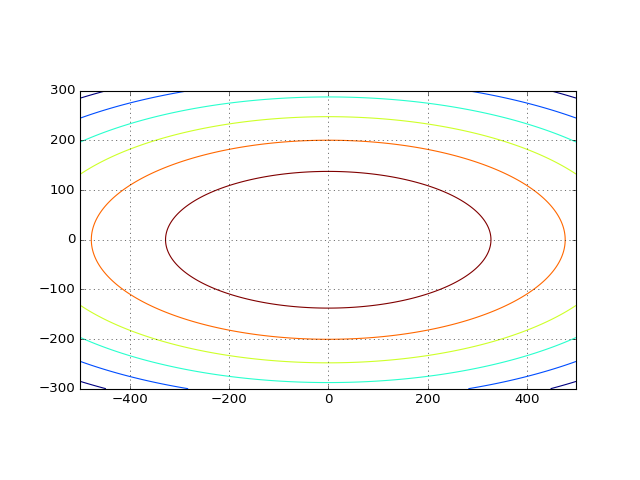

<IPython.core.display.Javascript object>


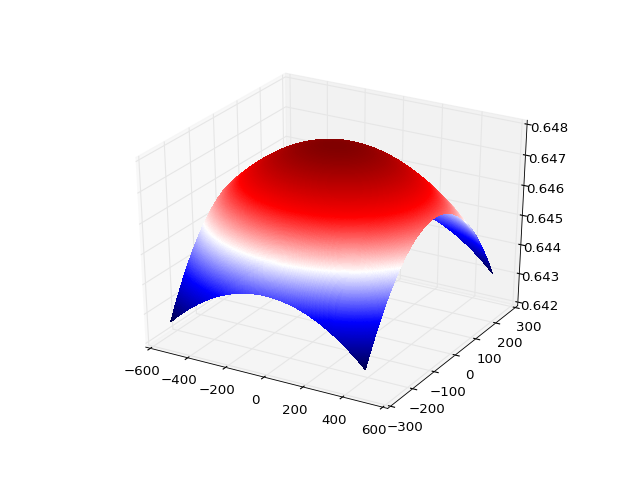

<IPython.core.display.Javascript object>


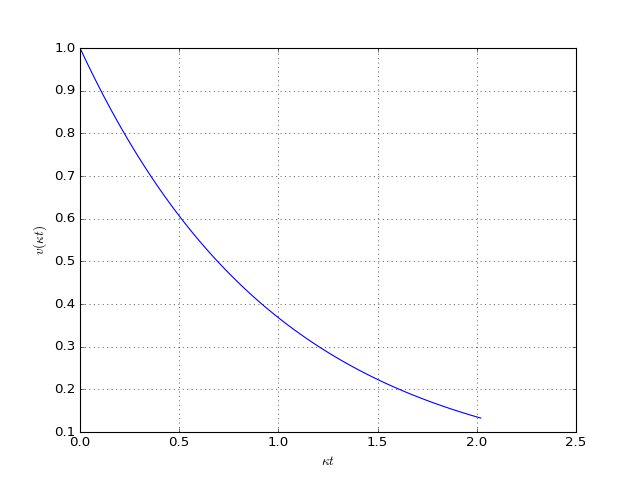

C:\Users\nnem614\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


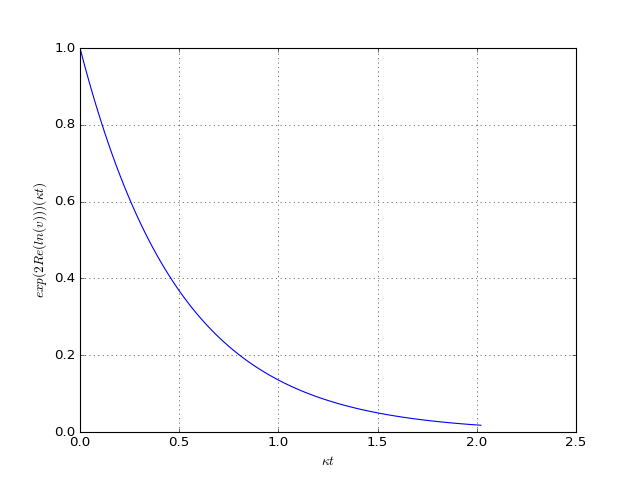

<IPython.core.display.Javascript object>


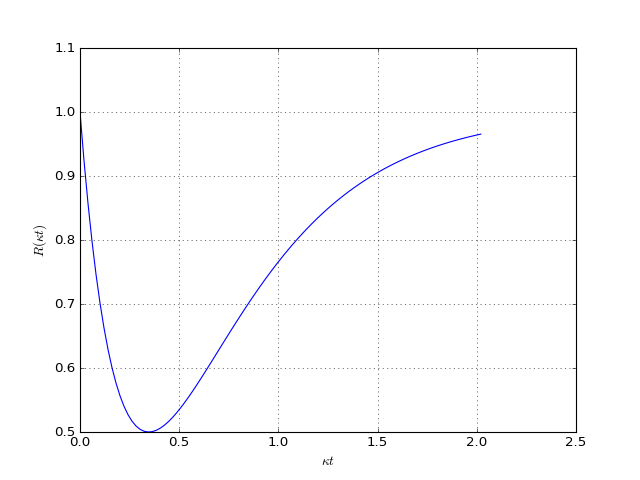

In [96]:
%matplotlib nbagg
from pylab import *
import scipy.misc
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

#Parameters:
rb    = 0.5
L     = 0.
k     = 0#2*sqrt(rb*(1-rb)*(1-L))
print(k)
eps   = 0.7
delta = 0. 
ktau  = 2
phi   = pi
theta = pi/2

lamb_s  = 860e-9
c       = 3e8
om_s    = 2*pi*c/lamb_s
rt_len  = 500e-3
T1      = 0.123
kappa   = 0.5*T1/rt_len*c
print(kappa)
om_c    = om_s+delta*kappa

#eps_omc = eps/om_c*kappa
eps_omc = eps
om_d    = sqrt(om_c**2-(eps*kappa)**2)
delta_d = (om_d/kappa-om_s/kappa)
print("delta_d=",delta_d)
#omh_c   = 1./sqrt(1-eps_omc**2)
omh_c   = kappa/om_d
#print(omh_c)
N       = 100
time    = 0
Nt      = 100
kt_step = ktau/(Nt-1)
print(kt_step)

vend = 0
x = arange(-500.,500.,1)
y = arange(-300.,300.,1)
x,y = meshgrid(x,y)
num = (time+1)*(N+1)
vf = zeros(num)+0j
#print(vf)
expvf = zeros(num)+0j
Rf = zeros(num)
#print(expvf)

# Calculating v
for n in range(time+1):
    #print("n=",n)
    for i in range(N+1):
        kt = (n*N+i)*kt_step
        #v0 = exp(-(1j*(delta-eps_omc*eps)+1)*kt)
        v0 = exp(-(1j*delta_d+1)*kt)
        #print("v0=",v0)
        v_term = 0
        for m in range(n+1):
            fact   = 1/math.factorial(m)
#            v_term = v_term + fact*(-k*exp(1j*phi+\
#                    (1j*(delta-eps_omc*eps)+1)*ktau)*\
#                    (kt-m*ktau))**m
            v_term = v_term + fact*(-k*exp(1j*phi+\
                    (1j*delta_d+1)*ktau)*\
                    (kt-m*ktau))**m
            #print("v_term=",v_term)
        v    = v0*v_term
        #print(v)
        expv = exp(2*real(log(v)))
        #print(log(expv)/2/kt)
        #R    = 1 + eps_omc**2 * expv * (1.-expv)
        R    = 2*(1-omh_c)*expv*(expv-1)+1
        Rf[n*(N+1)+i]=R
        #print(R)
        vf[(n)*(N+1)+i]    = v
        #print(vf[(n)*(N+1)+i])
        expvf[(n)*(N+1)+i] = expv
#print("R=",R)        
#print("v=",v)
#print("expv=",expv)
W1       = delta_d/om_d * expv*(x**2+y**2)
CW2      = (1-expv)*omh_c
W2       = (1-eps_omc*sin(theta))*x**2 + \
2*eps_omc*cos(theta)*x*y + (1+eps_omc*sin(theta))*y**2
W = 2./pi*sqrt(1/R)*exp(-2/(R) * (W1 + CW2*W2))
#W0 = 2./pi*exp(-2*(x**2+y**2))


#Plot
fig0 = plt.figure()
ax0 = fig0.gca()
ax0.contour(x, y, W)
ax0.grid(True)
ax0.set_aspect('equal')
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, W, rstride=1, cstride=1, cmap=cm.seismic,
                       linewidth=0, antialiased=False)

fig2= plt.figure()
ax2 =fig2.gca()
ax2.plot(arange(0,num,1)*kt_step,vf)
ax2.set_xlabel("$\kappa t$")
ax2.set_ylabel("$v(\kappa t)$")
ax2.grid(True)
fig3= plt.figure()
ax3 =fig3.gca()
ax3.plot(arange(0,num,1)*kt_step,expvf)
ax3.set_xlabel("$\kappa t$")
ax3.set_ylabel("$exp(2Re(ln(v)))(\kappa t)$")
ax3.grid(True)
fig4= plt.figure()
ax4 =fig4.gca()
ax4.plot(arange(0,num,1)*kt_step,Rf)
ax4.set_xlabel("$\kappa t$")
ax4.set_ylabel("$R(\kappa t)$")
ax4.grid(True)
plt.show()

SyntaxError: invalid syntax (<ipython-input-5-039d9d04685e>, line 1)

<IPython.core.display.Javascript object>


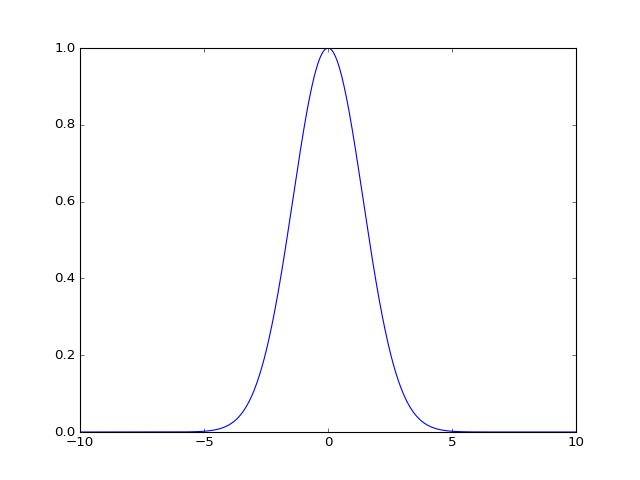

In [83]:
%matplotlib nbagg
t=linspace(-10,10,1000)
func=exp(-t**2/4)
plot(t,func)
plt.show()

## Interaction picture

In [19]:
%matplotlib nbagg
from pylab import *
import scipy.misc
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

#Parameters:
x     = 0.75
ktau  = 1.8833
delta = 0. 
phi   = 0. 
epsd  = sqrt(x**2-delta**2)
eta   = epsd - 1j*delta
L     = 0.
rb    = 0.5
k     = 2*sqrt((1-L)*rb*(1-rb))
const = 1/(2*eta*epsd)
theta = 0.

N_time  = 100
N_tau   = 10

for i_t in range(0,N_time+1):
    v0 = 0.
    v1 = 0.
    kt      = i_t * ktau/N_tau 
    N_cycle = int(i_t/N_tau)
    #i_tau   = i_t - N_cycle*N_tau
    #print("i_t=%d" % i_t)
    #print("N_cycle=%d" % N_cycle)
    if ((i_t+10)%N_tau)==0:
        vsum1  = 0.+0.j
        vsum2  = 0.+0.j
        vdsum1 = 0.+0.j
        vdsum2 = 0.+0.j
        for i_cyc in range(0,N_cycle+1):
         #   print(i_cyc)
            fact   = 1/math.factorial(i_cyc)
            vsum1 = vsum1 + fact*(-k*exp(1j*phi+(1-epsd)*ktau)*(kt-i_cyc*ktau))**i_cyc
            vsum2 = vsum2 + fact*(-k*exp(1j*phi+(1+epsd)*ktau)*(kt-i_cyc*ktau))**i_cyc
            if i_cyc<N_cycle:
                vdsum1 = vdsum1 + fact*(-k*exp(1j*phi+(1-epsd)*ktau)*(kt-i_cyc*ktau))**i_cyc
                vdsum2 = vdsum2 + fact*(-k*exp(1j*phi+(1+epsd)*ktau)*(kt-i_cyc*ktau))**i_cyc
    v0  = const * ( eta**2*exp(-(1-epsd)*kt)*vsum1 + x**2*exp(-(1+epsd)*kt)*vsum2 )
    v1  = const * x * conj(eta) * ( exp(-(1-epsd)*kt)*vsum1 - exp(-(1+epsd)*kt)*vsum2 )
    v0d = const * ( eta**2*exp(-(1-epsd)*kt)*vdsum1 + x**2*exp(-(1+epsd)*kt)*vdsum2 )
    v1d = const * x * conj(eta) * ( exp(-(1-epsd)*kt)*vdsum1 - exp(-(1+epsd)*kt)*vdsum2 )
    
    gam_m  = -(1j*delta+1)*k*exp(1j*phi) * \
    (v0d*conj(v0) - v1d*conj(v1)) / (v0*conj(v0) - v1*conj(v1))
    gam_p  = x + k*exp(1j*phi) * (v0d*v1 - v1d*v0) / (v0*conj(v0) - v1*conj(v1))
    gam_pr = real(gam_p)
    gam_mr = real(gam_m)
    gam_pi = imag(gam_p)
    gam_mi = imag(gam_m)
    gam_c  = sqrt(gam_pr**2+gam_pi**2-gam_mi**2)
    D      = gam_mr(gam_mi**2+gam_mr**2-gam_pi**2-gam_pr**2)
    
    c_1  = - (gam_c+gam_pr+gam_pi-gam_mi)/(2*(gam_pi-gam_mi)*gam_c)
    c_2  = - (gam_c-gam_pr-gam_pi+gam_mi)/(2*(gam_pi-gam_mi)*gam_c)
    c_k  = 1/8/D* \ 
    ((gam_mi+gam_pi)*(gam_mr*(gam_mi+gam_pi)+x*(-gam_pi*cos(theta)+sin(theta)*(gam_mr-gam_pr))) + \
    (gam_mr+gam_pr)*(gam_mr*(gam_mr+gam_pr)+x*gam_mr*cos(theta)))
    c_l  = 1/4/D* \
    ((gam_mi-gam_pi)*(gam_mr*(gam_mi-gam_pi)-x*(gam_pi*cos(theta)+(gam_mr-gam_pr)*sin(theta))) + \
    (gam_mr-gam_pr)*(gam_mr*(gam_mr-gam_pr)-x*gam_mr*cos(theta)))
    c_kl = 1/4/D * \
    (2*gam_mr*(gam_mr*gam_pi-gam_mi*gam_pr) + \
     x*((gam_pi*gam_pr-gam_mi*gam_mr)*cos(theta)+(gam_mr**2-gam_pr**2*sin(theta))))
    
    T = c_kl*(1-K*L)

i_t=0
N_cycle=0
0
i_t=1
N_cycle=0
i_t=2
N_cycle=0
i_t=3
N_cycle=0
i_t=4
N_cycle=0
i_t=5
N_cycle=0
i_t=6
N_cycle=0
i_t=7
N_cycle=0
i_t=8
N_cycle=0
i_t=9
N_cycle=0
i_t=10
N_cycle=1
0
1
i_t=11
N_cycle=1
i_t=12
N_cycle=1
i_t=13
N_cycle=1
i_t=14
N_cycle=1
i_t=15
N_cycle=1
i_t=16
N_cycle=1
i_t=17
N_cycle=1
i_t=18
N_cycle=1
i_t=19
N_cycle=1
i_t=20
N_cycle=2
0
1
2
i_t=21
N_cycle=2
i_t=22
N_cycle=2
i_t=23
N_cycle=2
i_t=24
N_cycle=2
i_t=25
N_cycle=2
i_t=26
N_cycle=2
i_t=27
N_cycle=2
i_t=28
N_cycle=2
i_t=29
N_cycle=2
i_t=30
N_cycle=3
0
1
2
3
i_t=31
N_cycle=3
i_t=32
N_cycle=3
i_t=33
N_cycle=3
i_t=34
N_cycle=3
i_t=35
N_cycle=3
i_t=36
N_cycle=3
i_t=37
N_cycle=3
i_t=38
N_cycle=3
i_t=39
N_cycle=3
i_t=40
N_cycle=4
0
1
2
3
4
i_t=41
N_cycle=4
i_t=42
N_cycle=4
i_t=43
N_cycle=4
i_t=44
N_cycle=4
i_t=45
N_cycle=4
i_t=46
N_cycle=4
i_t=47
N_cycle=4
i_t=48
N_cycle=4
i_t=49
N_cycle=4
i_t=50
N_cycle=5
0
1
2
3
4
5
i_t=51
N_cycle=5
i_t=52
N_cycle=5
i_t=53
N_cycle=5
i_t=54
N_cycle=5
i_t=55
N_cycle=5
i_t=56
N_cycle=5

In [8]:
%matplotlib nbagg
from pylab import *
import scipy.misc
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
conj(1+1j)
for i in range(0,5):
    print(i)
    if i<2:
        print('i=2')
a=1j
print(0.+0.j+a)
abs(1+1j)**2
(1+1j)*conj(1+1j)
imag(1+2j)

0
i=2
1
i=2
2
3
4
1j


array(2.0)

In [10]:
1/(2*pi*10**7)

1.5915494309189534e-08